In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Load and Inspect Data

In [30]:
gcredit = pd.read_csv("C://users//chuiw1//tree-based-algorithms-mini-project//GermanCredit.csv.zip")
gcredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [31]:
gcredit.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


## Create X and y 

In [32]:
pd.unique(gcredit['Class'])

array(['Good', 'Bad'], dtype=object)

In [33]:
X = gcredit.drop(columns=['Class'])
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [34]:
y = gcredit[['Class']].copy()
y.head()

,Class
0,Good
1,Bad
2,Good
3,Good
4,Bad


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Accuracy Table

In [36]:
accuracy_table = pd.DataFrame(columns=["Tree Algorithm", "Macro Average Accuracy", "Weighted Average Accuracy"])

## Decision Tree 

In [37]:
estimator = DecisionTreeClassifier()
max_depth=np.linspace(5, 10, 5)
classifier = GridSearchCV(estimator=estimator, param_grid=dict(max_depth=max_depth), n_jobs=10)
classifier.fit(X_train, y_train)
print("Best Estimator learned through GridSearch") 
print(classifier.best_estimator_)

Best Estimator learned through GridSearch
DecisionTreeClassifier(max_depth=6.25)


In [38]:
y_pred=classifier.predict(X_test)
clsf_report = classification_report(y_test, y_pred)
print(clsf_report)

              precision    recall  f1-score   support

         Bad       0.46      0.35      0.40        88
        Good       0.76      0.83      0.79       212

    accuracy                           0.69       300
   macro avg       0.61      0.59      0.60       300
weighted avg       0.67      0.69      0.68       300



In [39]:
accuracy_table = accuracy_table.append({'Tree Algorithm':"Decision Tree", 
                                        'Macro Average Accuracy':0.66, 
                                        'Weighted Average Accuracy':0.72}, 
                                       ignore_index=True)

## Visualize Decision Tree

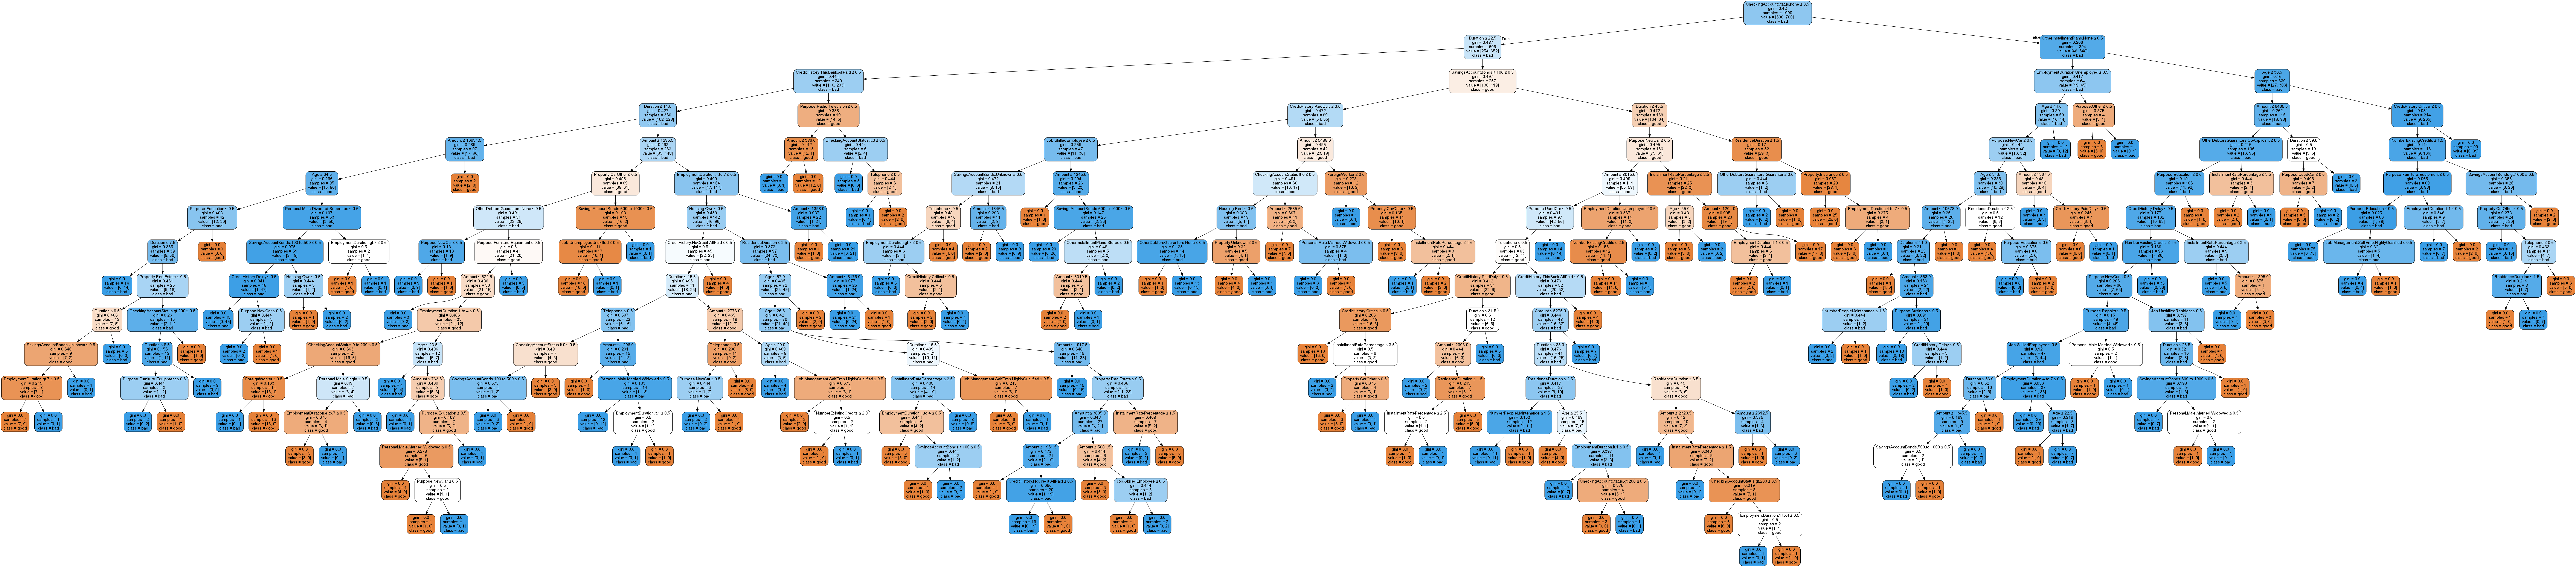

In [40]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
estimator.fit(X, y)
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['good', 'bad'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan.png')
Image(graph.create_png())

## Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randomEstimator = RandomForestClassifier()
max_depth=np.linspace(5,10,5) 
n_estimators=[10, 100, 1000]
randomClassifier = GridSearchCV(estimator=randomEstimator, param_grid=dict(n_estimators=n_estimators, max_depth=max_depth), n_jobs=10) 
randomClassifier.fit(X_train, y_train.values.ravel(order='C')) 
print("Best Estimator learned through GridSearch") 
print(randomClassifier.best_estimator_) 

Best Estimator learned through GridSearch
RandomForestClassifier(max_depth=8.75)


In [43]:
y_pred=randomClassifier.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.62      0.38      0.47        88
        Good       0.78      0.91      0.84       212

    accuracy                           0.75       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.73      0.75      0.73       300



In [44]:
accuracy_table = accuracy_table.append({'Tree Algorithm':"Random Tree", 
                                        'Macro Average Accuracy':0.79, 
                                        'Weighted Average Accuracy':0.79}, 
                                       ignore_index=True)

## Visualize Random Trees

<AxesSubplot:>

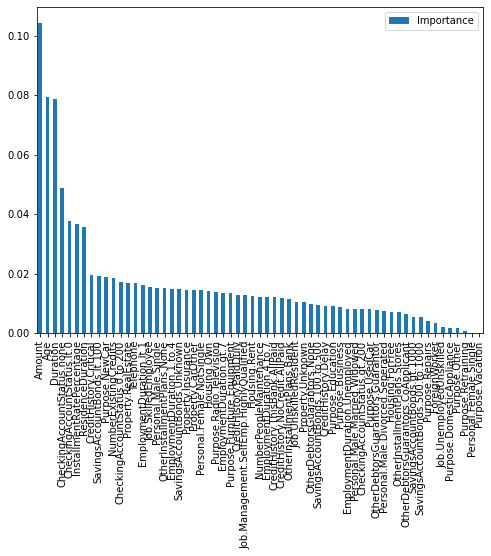

In [45]:
from matplotlib import *
randomEstimator.fit(X, y.values.ravel('C'))
feat_importances = pd.DataFrame(randomEstimator.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='Amount', ylabel='Age'>})

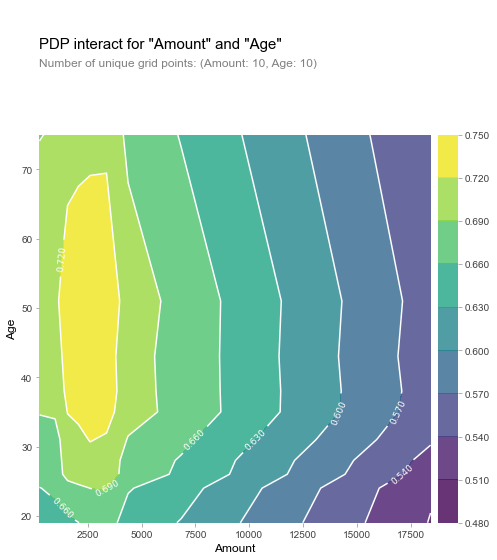

In [46]:
from pdpbox import pdp
randomEstimator.fit(X, y.values.ravel('C'))
pdp_amount_age = pdp.pdp_interact(randomEstimator, gcredit, X.columns, ['Amount','Age'])
pdp.pdp_interact_plot(pdp_amount_age, ['Amount','Age'], plot_type='contour', x_quantile=False, plot_pdp=False, which_classes=None, figsize=None, ncols=2, plot_params=None)

## XGBoost

In [47]:
import xgboost as xgb
xgbestimator = xgb.XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
xgbclassifier = GridSearchCV(xgbestimator, param_grid, scoring="neg_log_loss", n_jobs=-1)
xgbclassifier.fit(X_train, y_train)
print("Best Estimator learned through GridSearch") 
print("Best: %f using %s" % (xgbclassifier.best_score_, xgbclassifier.best_params_))

[21:55:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Estimator learned through GridSearch
Best: -0.619031 using {'n_estimators': 50}


In [48]:
y_pred = xgbclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.57      0.53      0.55        88
        Good       0.81      0.83      0.82       212

    accuracy                           0.75       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.74      0.75      0.74       300



In [49]:
accuracy_table = accuracy_table.append({'Tree Algorithm':"XGBoost", 
                                        'Macro Average Accuracy':0.72, 
                                        'Weighted Average Accuracy':0.76}, 
                                       ignore_index=True)

## CatBoost

In [50]:
from catboost import Pool
from catboost import CatBoostClassifier

params = {'loss_function':'Logloss', 'eval_metric':'AUC', 'verbose': 200, 'random_seed': 1}

train_data = Pool(data=X_train, label=y_train, cat_features=X.columns)
test_data = Pool(data=X_test, cat_features=X.columns)

catclassifier = CatBoostClassifier(**params)
catclassifier.fit(train_data, use_best_model=True)

y_pred = catclassifier.predict(test_data)
print(classification_report(y_test, y_pred))

Learning rate set to 0.008847
0:	total: 31.8ms	remaining: 31.7s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


200:	total: 4.71s	remaining: 18.7s
400:	total: 9.78s	remaining: 14.6s
600:	total: 14.8s	remaining: 9.86s
800:	total: 20.2s	remaining: 5.02s
999:	total: 25.5s	remaining: 0us
              precision    recall  f1-score   support

         Bad       0.57      0.41      0.48        88
        Good       0.78      0.87      0.82       212

    accuracy                           0.74       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300



In [51]:
accuracy_table = accuracy_table.append({'Tree Algorithm':"CatBoost", 
                                        'Macro Average Accuracy':0.73, 
                                        'Weighted Average Accuracy':0.76}, 
                                       ignore_index=True)

## lightgbm

In [52]:
from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.53      0.53      0.53        88
        Good       0.81      0.81      0.81       212

    accuracy                           0.73       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.73      0.73      0.73       300



In [53]:
accuracy_table = accuracy_table.append({'Tree Algorithm':"lightgbm", 
                                        'Macro Average Accuracy':0.70, 
                                        'Weighted Average Accuracy':0.74}, 
                                       ignore_index=True)

## Accuracy Table

In [54]:
print("The acuracy table is:")
accuracy_table.head()

The acuracy table is:


,Tree Algorithm,Macro Average Accuracy,Weighted Average Accuracy
0,Decision Tree,0.66,0.72
1,Random Tree,0.79,0.79
2,XGBoost,0.72,0.76
3,CatBoost,0.73,0.76
4,lightgbm,0.70,0.74
